###### Анализ средних показателей "энергичность" и "танцевальность" по жанру

## Индивидуальное задание вариант 16

**Задача:** Средние показатели "энергичность" и "танцевальность" по жанру

**Источник данных:**  https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db/data?select=SpotifyFeatures.csv

## 1. Загрузка данных из HDFS

Сначала подключимся к Hadoop и загрузим данные из HDFS.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import os
import io

# Настройка отображения
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
# Для Jupyter можно оставлять эту строчку:
# %matplotlib inline

# Увеличение размера графиков
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
import pandas as pd
import os
import subprocess

print("Загрузка данных из HDFS ...")

hdfs_path = "/user/hadoop/input2/database.csv"
local_path = "/opt/database.csv"

print(os.listdir("/opt"))

try:
    # Удаляем локальный файл, если он существует (чтобы избежать ошибки "File exists")
    if os.path.exists(local_path):
        os.remove(local_path)

    hdfs_download_cmd = f"hdfs dfs -get {hdfs_path} {local_path}"
    print(f"Выполнение команды: {hdfs_download_cmd}")

    env = dict(os.environ, **{'JAVA_HOME': '/usr/lib/jvm/java-11-openjdk-amd64'})
    result = subprocess.run(hdfs_download_cmd, shell=True, capture_output=True, text=True, cwd="/opt", env=env)

    if result.returncode == 0:
        print(f"Данные успешно загружены из HDFS: {hdfs_path}")
    else:
        print(f"Ошибка при загрузке из HDFS: {result.stderr}")
        print("Попытка найти файл локально ...")
        local_path = "/opt/data/database.csv"

    if not os.path.exists(local_path):
        print(f"Файл не найден в {local_path}. Используем альтернативный путь ...")
        local_path = "database.csv"

except Exception as e:
    print(f"Ошибка при выполнении subprocess: {e}")
    print("Попытка использовать локальный файл ...")
    local_path = "/opt/data/database.csv"

if not os.path.exists(local_path):
    print("Файл не найден. Пробуем последний вариант ...")
    local_path = "database.csv"

if os.path.exists(local_path):
    df = pd.read_csv(local_path, encoding='utf-8-sig', sep=',', quotechar='"', engine='python', on_bad_lines='skip')
    print(f"Размер датасета: {df.shape}")
    print(f"Данные успешно загружены из {local_path}")
    print(df.head())
else:
    print("ОШИБКА: Файл database.csv не найден!")
    print("Искали по следующим путям:")
    print(" - /opt/database.csv (из HDFS)")
    print(" - /opt/data/database.csv (локальный)")
    print(" - database.csv (в текущей директории)")
    df = pd.DataFrame()


Загрузка данных из HDFS ...
['hadoop_data', 'database.csv', 'hadoop', 'notebooks', 'scripts', 'data']
Выполнение команды: hdfs dfs -get /user/hadoop/input2/database.csv /opt/database.csv
Данные успешно загружены из HDFS: /user/hadoop/input2/database.csv
Размер датасета: (213146, 18)
Данные успешно загружены из /opt/database.csv
   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  

In [4]:
# Очистка данных
df_clean = df.copy()

# Вместо 'Magnitude' теперь проверяем 'valence' (показатель позитивности трека)
df_clean = df_clean[df_clean['valence;;;'].notna()]

# Вместо 'Type' - это 'genre', пропуски заполняем 'Unknown'
df_clean['genre'] = df_clean['genre'].fillna('Unknown')

print(f"Количество строк после очистки: {len(df_clean)}")
print(f"Жанры в данных: {df_clean['genre'].unique()}")

Количество строк после очистки: 213146
Жанры в данных: ['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']


In [5]:
# Очищаем названия столбцов от лишних пробелов и знаков ';'
df.columns = df.columns.str.strip().str.replace(';', '')

# После очистки обращаемся уже к валидным именам колонок
df_clean = df.copy()

# Теперь колонка valence должна быть доступна под этим именем
df_clean = df_clean[df_clean['valence'].notna()]

# Аналогично для genre
df_clean['genre'] = df_clean['genre'].fillna('Unknown')

print(f"Количество строк после очистки: {len(df_clean)}")
print(f"Уникальные жанры: {df_clean['genre'].unique()}")

Количество строк после очистки: 213146
Уникальные жанры: ['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']


In [6]:
print(df.columns)

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [7]:
# Удаляем из значений колонки valence все точки с запятой и пробелы, приводим к числу, пропуски в NaN
df_clean['valence'] = df_clean['valence'].str.replace(';', '').str.strip()
df_clean['valence'] = pd.to_numeric(df_clean['valence'], errors='coerce')

# Заполняем пропуски в valence средним значением (или другим подходящим)
df_clean['valence'] = df_clean['valence'].fillna(df_clean['valence'].mean())

# Для колонки genre удаляем лишние пробелы и символы
df_clean['genre'] = df_clean['genre'].str.strip().str.replace(';', '').str.lower()
df_clean['genre'] = df_clean['genre'].fillna('unknown')

# Теперь можно без проблем группировать по жанру и считать среднее valence
magnitude_by_type = df_clean.groupby('genre')['valence'].agg(['mean', 'count']).reset_index()
magnitude_by_type.columns = ['Genre', 'Mean_Valence', 'Count']
magnitude_by_type = magnitude_by_type.sort_values('Mean_Valence', ascending=False)

print(magnitude_by_type)

               Genre  Mean_Valence  Count
4   children's music      0.679224   4931
20            reggae      0.679051   8569
21         reggaeton      0.659270   8270
23               ska      0.653594   8597
3              blues      0.579533   8530
8            country      0.533162   8374
22              rock      0.516507   9005
9              dance      0.516357   8466
14              jazz      0.508763   9054
17               pop      0.481197   9140
24              soul      0.477943   8807
12           hip-hop      0.473314   8994
15             movie      0.460136   6609
19               rap      0.455357   8956
1        alternative      0.450357   9085
18               r&b      0.450115   8780
5   children’s music      0.449522   9184
2              anime      0.447013   8484
11              folk      0.439702   8918
13             indie      0.428673   9378
7             comedy      0.408871   9081
10        electronic      0.387886   9246
0          a capella      0.331134

## 2. Анализ магнитуды по типам


In [35]:
# Группировка по типу и вычисление средней магнитуды
magnitude_by_type = df_clean.groupby('genre')['valence'].agg(['mean', 'count']).reset_index()
magnitude_by_type.columns = ['Genre', 'Mean_Valence', 'Count']
magnitude_by_type = magnitude_by_type.sort_values('Mean_Valence', ascending=False)

print("Средняя valence по жанрам:")
print(magnitude_by_type)

Средняя valence по жанрам:
               Genre  Mean_Valence  Count
4   children's music      0.679224   4931
20            reggae      0.679051   8569
21         reggaeton      0.659270   8270
23               ska      0.653594   8597
3              blues      0.579533   8530
8            country      0.533162   8374
22              rock      0.516507   9005
9              dance      0.516357   8466
14              jazz      0.508763   9054
17               pop      0.481197   9140
24              soul      0.477943   8807
12           hip-hop      0.473314   8994
15             movie      0.460136   6609
19               rap      0.455357   8956
1        alternative      0.450357   9085
18               r&b      0.450115   8780
5   children’s music      0.449522   9184
2              anime      0.447013   8484
11              folk      0.439702   8918
13             indie      0.428673   9378
7             comedy      0.408871   9081
10        electronic      0.387886   9246
0      

In [8]:
# Результат
max_type = magnitude_by_type.iloc[0]
print(f"Жанр с максимальной средней valence: {max_type['Genre']}")
print(f"Средняя valence: {max_type['Mean_Valence']:.3f}")
print(f"Количество треков: {int(max_type['Count'])}")


Жанр с максимальной средней valence: children's music
Средняя valence: 0.679
Количество треков: 4931


## 3. Визуализация


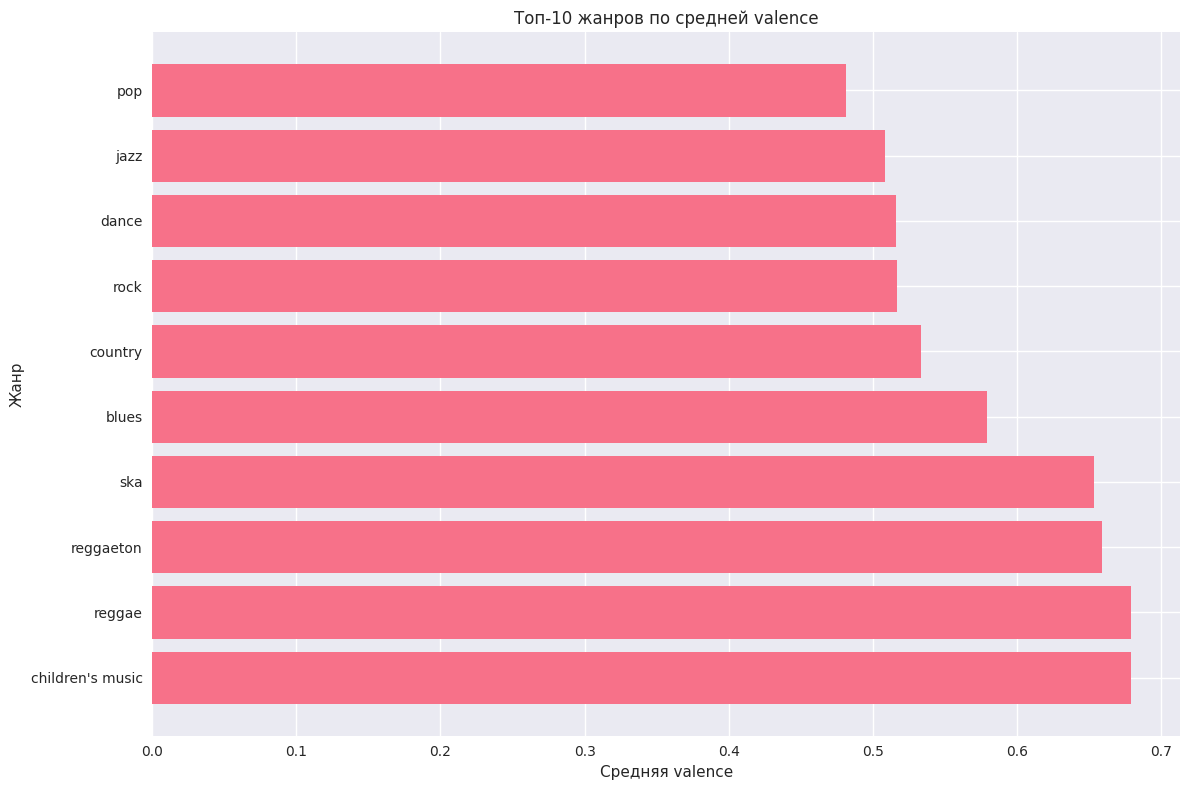

In [11]:
# График средней магнитуды по типам
plt.figure(figsize=(12, 8))
top_10 = magnitude_by_type.head(10)
plt.barh(top_10['Genre'], top_10['Mean_Valence'])
plt.xlabel('Средняя valence')
plt.ylabel('Жанр')
plt.title('Топ-10 жанров по средней valence')
plt.tight_layout()
plt.show()


In [12]:
!pwd

/opt/notebooks


In [13]:
%pip install hdfs

Note: you may need to restart the kernel to use updated packages.


TypeError: makedirs() got an unexpected keyword argument 'exist_ok'

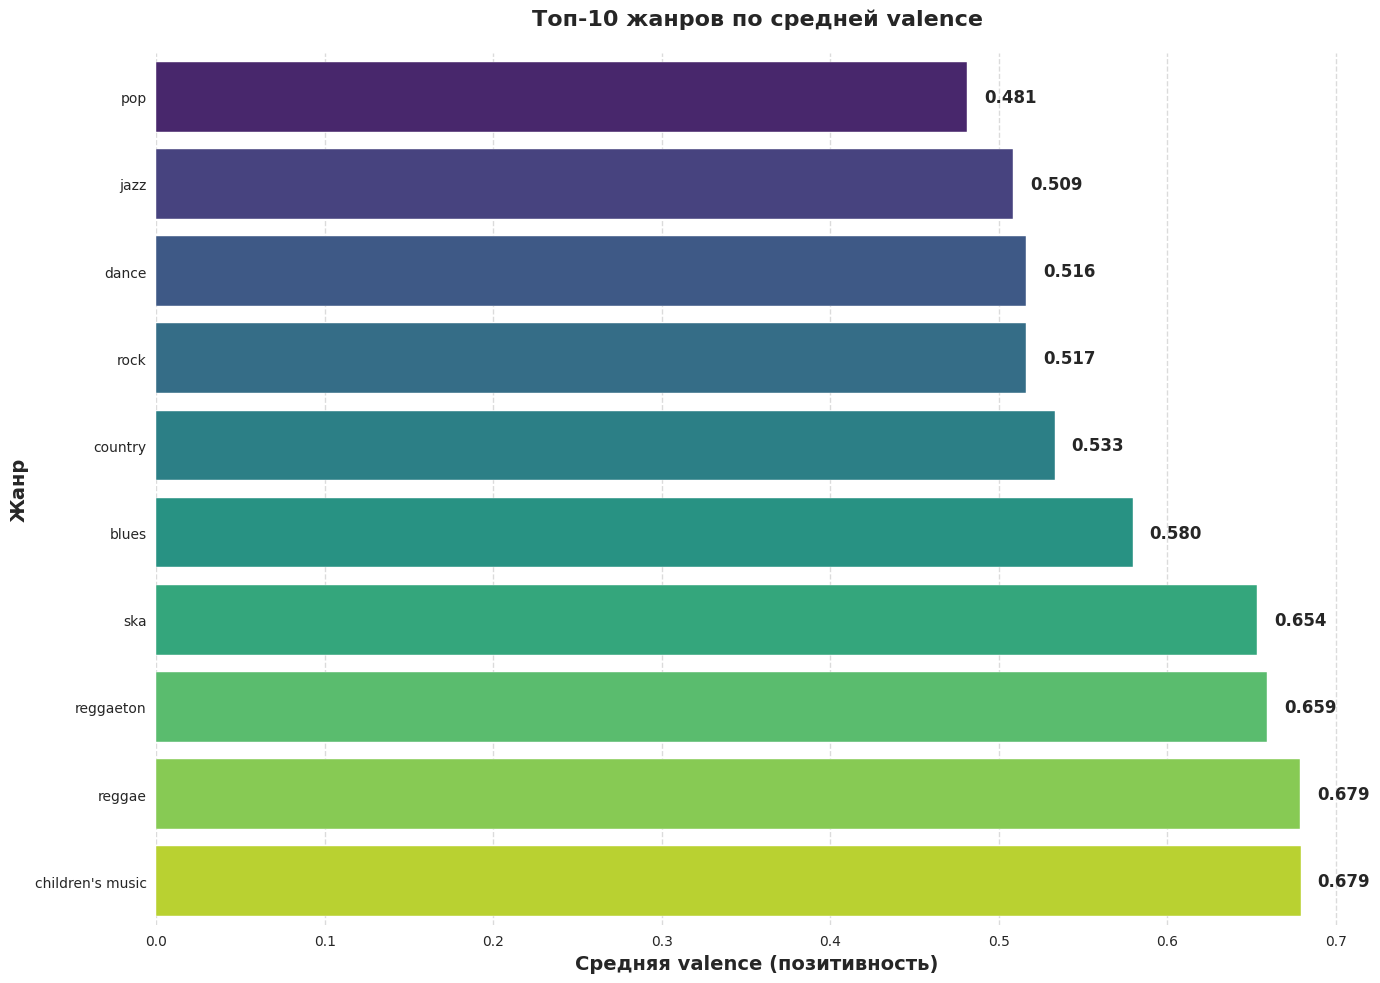

In [14]:
import io
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from hdfs import InsecureClient

# Установка стиля seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# Предполагаем, что magnitude_by_type уже существует
# Создаем топ-10 жанров
top_10 = magnitude_by_type.head(10).sort_values('Mean_Valence', ascending=True)

# Создаем график
fig, ax = plt.subplots(figsize=(14, 10))

# Используем barplot от seaborn
barplot = sns.barplot(
    data=top_10,
    x='Mean_Valence',
    y='Genre',
    palette='viridis',  # Можно использовать: 'rocket', 'mako', 'crest', 'flare'
    ax=ax,
    hue='Genre',  # Добавляем hue для использования палитры
    legend=False,  # Отключаем легенду
    saturation=0.85  # Насыщенность цветов
)

# Настройка внешнего вида
ax.set_xlabel('Средняя valence (позитивность)', fontsize=14, fontweight='bold')
ax.set_ylabel('Жанр', fontsize=14, fontweight='bold')
ax.set_title('Топ-10 жанров по средней valence', fontsize=16, fontweight='bold', pad=20)

# Добавляем значения на столбцы
for i, (index, row) in enumerate(top_10.iterrows()):
    ax.text(
        row['Mean_Valence'] + 0.01,  # Смещение от столбца
        i,  # Позиция по y
        f'{row["Mean_Valence"]:.3f}',  # Форматированное значение
        va='center',
        fontsize=12,
        fontweight='bold'
    )

# Улучшаем сетку
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(False)

# Убираем рамку
sns.despine(left=True, bottom=True)

plt.tight_layout()

# Сохранение в буфер и HDFS
buffer = io.BytesIO()
plt.savefig(buffer, format='png', dpi=300, bbox_inches='tight', facecolor='white')
buffer.seek(0)

# Сохранение в HDFS
hdfs_path = '/user/hadoop/results/valence_by_genre_seaborn.png'
client = InsecureClient('http://hadoop:9870', user='root')
client.makedirs(os.path.dirname(hdfs_path), exist_ok=True)

with client.write(hdfs_path, overwrite=True) as writer:
    writer.write(buffer.getvalue())

print(f"График сохранён в HDFS: {hdfs_path}")
plt.show()

TypeError: makedirs() got an unexpected keyword argument 'exist_ok'

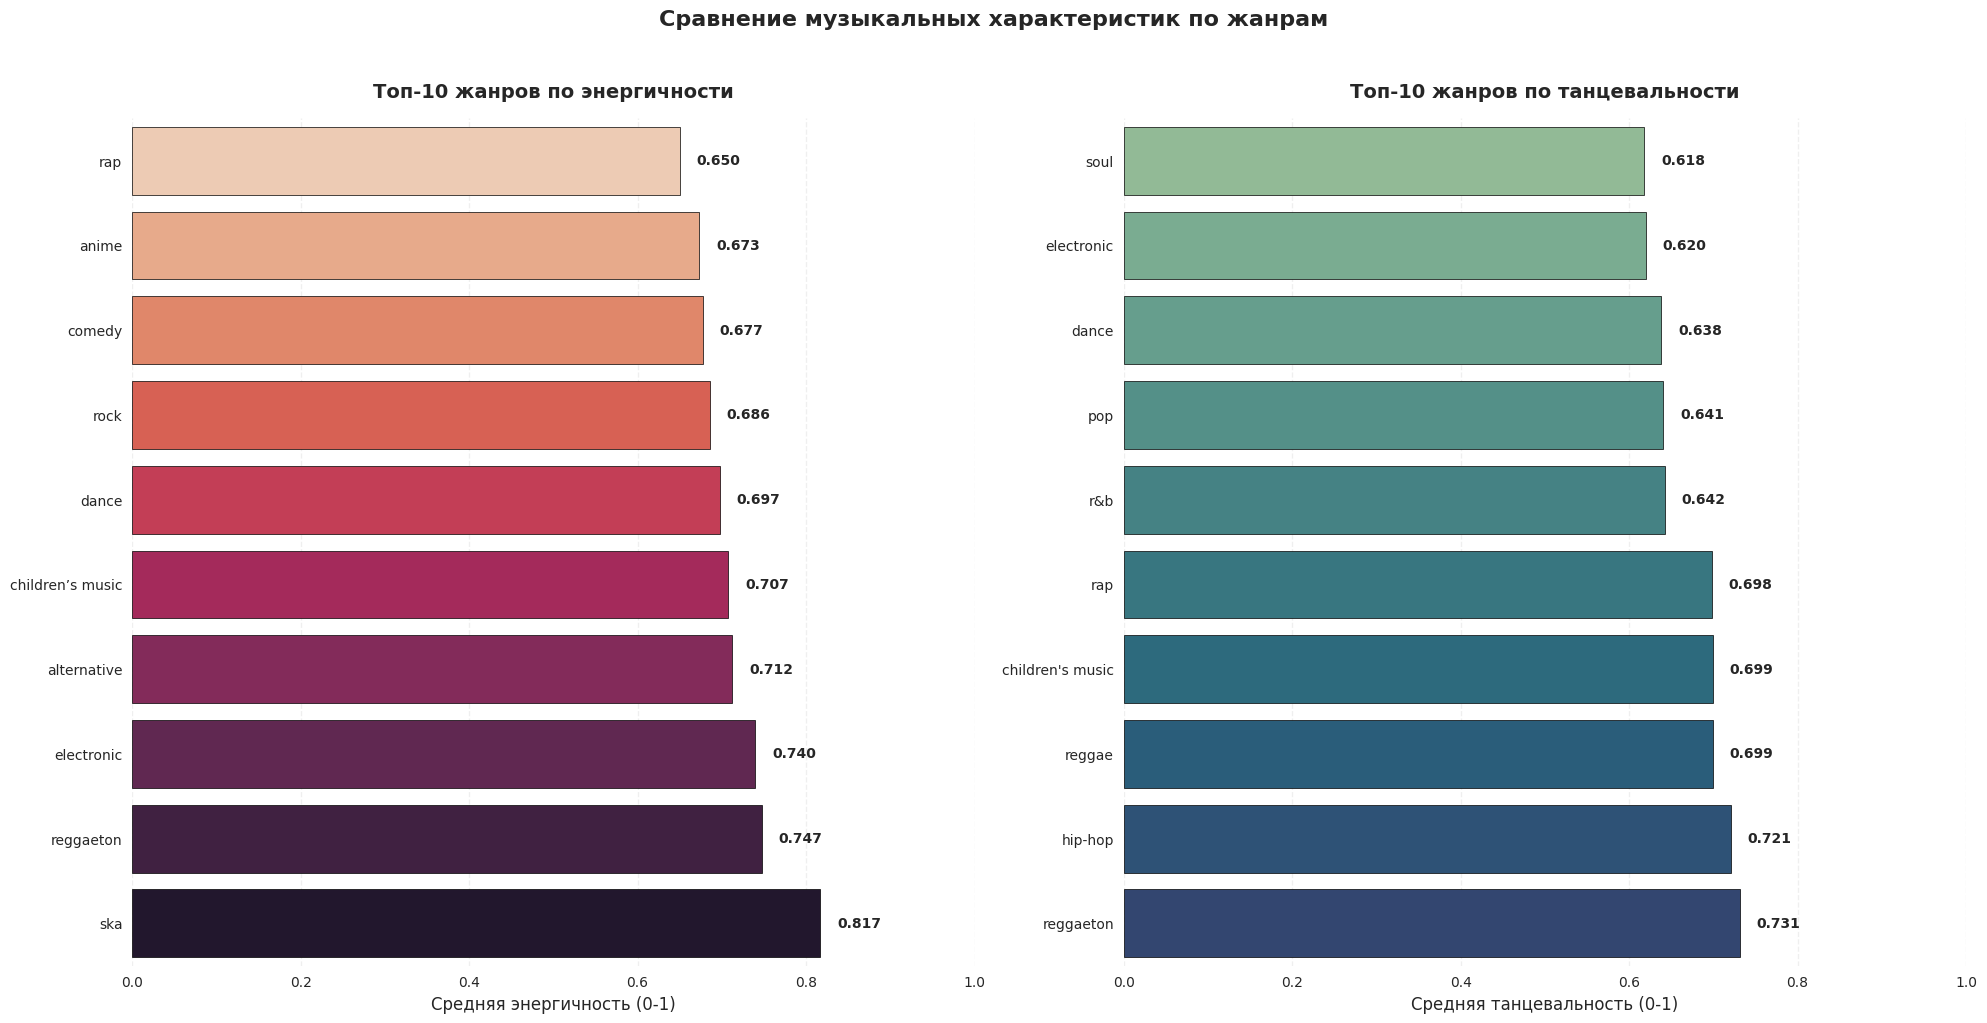

In [15]:
import io
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from hdfs import InsecureClient

# Установка стиля
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 11

# Подготовка данных (если еще не сделано)
if 'energy' in df_clean.columns and 'danceability' in df_clean.columns:
    # Преобразование строк в числа (если нужно)
    if df_clean['energy'].dtype == 'object':
        df_clean['energy'] = pd.to_numeric(
            df_clean['energy'].astype(str).str.replace(';', ''),
            errors='coerce'
        )
    if df_clean['danceability'].dtype == 'object':
        df_clean['danceability'] = pd.to_numeric(
            df_clean['danceability'].astype(str).str.replace(';', ''),
            errors='coerce'
        )

# Группировка и подготовка данных
def prepare_genre_data(df, column, n_top=10):
    """Подготовка данных по жанрам"""
    genre_stats = df.groupby('genre')[column].agg(['mean', 'count']).reset_index()
    genre_stats.columns = ['Genre', f'Mean_{column.capitalize()}', 'Count']
    genre_stats = genre_stats.sort_values(f'Mean_{column.capitalize()}', ascending=False)
    return genre_stats.head(n_top).sort_values(f'Mean_{column.capitalize()}', ascending=True)

energy_data = prepare_genre_data(df_clean, 'energy', 10)
dance_data = prepare_genre_data(df_clean, 'danceability', 10)

# Создание subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# График 1: Энергичность
sns.barplot(
    data=energy_data,
    x='Mean_Energy',
    y='Genre',
    palette='rocket_r',  # Реверсивная палитра
    ax=axes[0],
    hue='Genre',
    legend=False,
    edgecolor='black',
    linewidth=0.5
)

axes[0].set_title('Топ-10 жанров по энергичности', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Средняя энергичность (0-1)', fontsize=12)
axes[0].set_ylabel('')
axes[0].set_xlim(0, 1)

# Добавление значений
for i, (index, row) in enumerate(energy_data.iterrows()):
    axes[0].text(
        row['Mean_Energy'] + 0.02,
        i,
        f'{row["Mean_Energy"]:.3f}',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

# График 2: Танцевальность
sns.barplot(
    data=dance_data,
    x='Mean_Danceability',
    y='Genre',
    palette='crest',  # Другая палитра для контраста
    ax=axes[1],
    hue='Genre',
    legend=False,
    edgecolor='black',
    linewidth=0.5
)

axes[1].set_title('Топ-10 жанров по танцевальности', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Средняя танцевальность (0-1)', fontsize=12)
axes[1].set_ylabel('')
axes[1].set_xlim(0, 1)

# Добавление значений
for i, (index, row) in enumerate(dance_data.iterrows()):
    axes[1].text(
        row['Mean_Danceability'] + 0.02,
        i,
        f'{row["Mean_Danceability"]:.3f}',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

# Общие настройки
for ax in axes:
    ax.xaxis.grid(True, linestyle='--', alpha=0.3)
    ax.yaxis.grid(False)
    sns.despine(ax=ax, left=True, bottom=True)

plt.suptitle('Сравнение музыкальных характеристик по жанрам', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Сохранение
buffer = io.BytesIO()
plt.savefig(buffer, format='png', dpi=300, bbox_inches='tight')
buffer.seek(0)

hdfs_path = '/user/hadoop/results/energy_danceability_comparison.png'
client = InsecureClient('http://hadoop:9870', user='root')
client.makedirs(os.path.dirname(hdfs_path), exist_ok=True)

with client.write(hdfs_path, overwrite=True) as writer:
    writer.write(buffer.getvalue())

print(f"График сохранён в HDFS: {hdfs_path}")
plt.show()

# Вывод статистики
print("\n" + "="*50)
print("СТАТИСТИКА ПО ХАРАКТЕРИСТИКАМ")
print("="*50)
print("\n📊 ТОП-5 ЖАНРОВ ПО ЭНЕРГИЧНОСТИ:")
print(energy_data[['Genre', 'Mean_Energy']].round(3).head().to_string(index=False))
print("\n💃 ТОП-5 ЖАНРОВ ПО ТАНЦЕВАЛЬНОСТИ:")
print(dance_data[['Genre', 'Mean_Danceability']].round(3).head().to_string(index=False))

/tmp/ipykernel_3931/2677277540.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean_Energy', y='Genre', data=energy_by_genre.head(10),
/tmp/ipykernel_3931/2677277540.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean_Danceability', y='Genre', data=dance_by_genre.head(10),


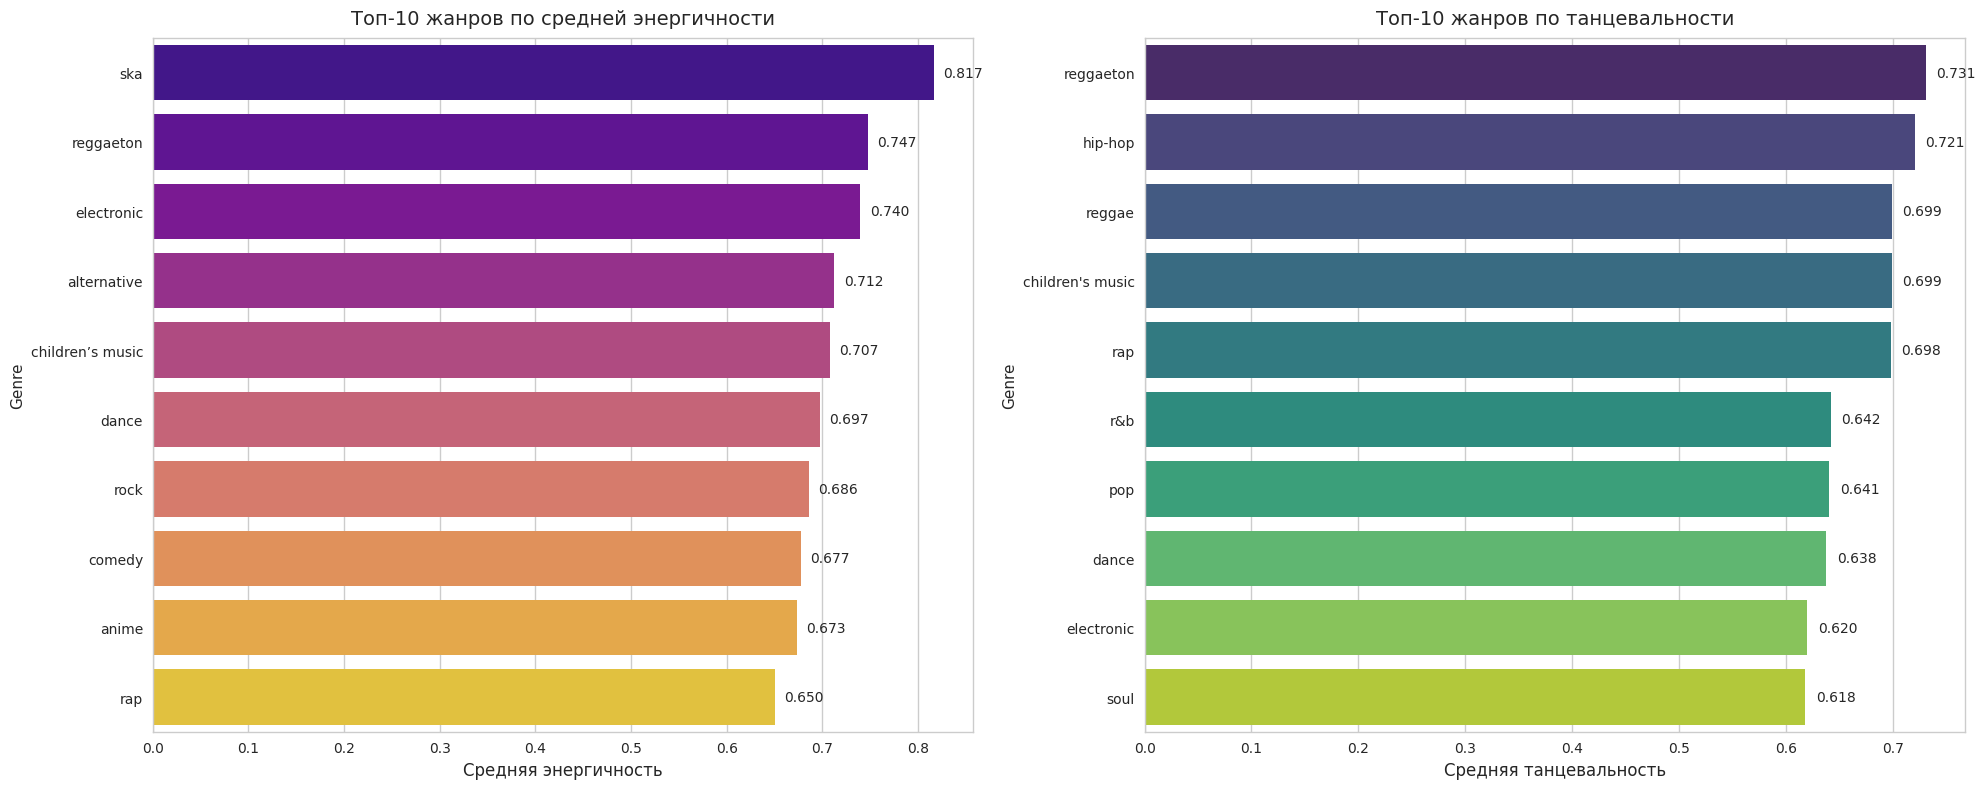

График сохранён в HDFS: /user/hadoop/results/energy_danceability_by_genre.png


In [44]:
import io
import os
import matplotlib.pyplot as plt
import seaborn as sns
from hdfs import InsecureClient

# 1. Подготовка данных
df_clean['energy'] = pd.to_numeric(df_clean['energy'].astype(str).str.replace(';', ''), errors='coerce')
df_clean['danceability'] = pd.to_numeric(df_clean['danceability'].astype(str).str.replace(';', ''), errors='coerce')

# Группировка по жанру
energy_by_genre = df_clean.groupby('genre')['energy'].agg(['mean', 'count']).reset_index()
energy_by_genre.columns = ['Genre', 'Mean_Energy', 'Count']
energy_by_genre = energy_by_genre.sort_values('Mean_Energy', ascending=False)

dance_by_genre = df_clean.groupby('genre')['danceability'].agg(['mean', 'count']).reset_index()
dance_by_genre.columns = ['Genre', 'Mean_Danceability', 'Count']
dance_by_genre = dance_by_genre.sort_values('Mean_Danceability', ascending=False)

# 2. Создание двух графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# График энергичности
sns.barplot(x='Mean_Energy', y='Genre', data=energy_by_genre.head(10), 
            palette='plasma', ax=ax1)
ax1.set_title('Топ-10 жанров по средней энергичности', fontsize=14, pad=10)
ax1.set_xlabel('Средняя энергичность', fontsize=12)
for bar in ax1.patches:
    ax1.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.3f}', va='center', ha='left', fontsize=10)

# График танцевальности
sns.barplot(x='Mean_Danceability', y='Genre', data=dance_by_genre.head(10), 
            palette='viridis', ax=ax2)
ax2.set_title('Топ-10 жанров по танцевальности', fontsize=14, pad=10)
ax2.set_xlabel('Средняя танцевальность', fontsize=12)
for bar in ax2.patches:
    ax2.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.3f}', va='center', ha='left', fontsize=10)

plt.tight_layout()

# 3. Сохранение в буфер и HDFS
buffer = io.BytesIO()
plt.savefig(buffer, format='png', dpi=300, bbox_inches='tight')
plt.show()
buffer.seek(0)

hdfs_path = '/user/hadoop/results/energy_danceability_by_genre.png'
client = InsecureClient('http://hadoop:9870', user='root')
client.makedirs(os.path.dirname(hdfs_path))
with client.write(hdfs_path, overwrite=True) as writer:
    writer.write(buffer.getvalue())

print(f"График сохранён в HDFS: {hdfs_path}")


In [45]:
print("=== ТОП-5 ЖАНРОВ ПО ЭНЕРГИЧНОСТИ ===")
print(energy_by_genre.head().round(3)[['Genre', 'Mean_Energy']])
print("\n=== ТОП-5 ЖАНРОВ ПО ТАНЦЕВАННОСТИ ===")
print(dance_by_genre.head().round(3)[['Genre', 'Mean_Danceability']])

=== ТОП-5 ЖАНРОВ ПО ЭНЕРГИЧНОСТИ ===
               Genre  Mean_Energy
23               ska        0.817
21         reggaeton        0.747
10        electronic        0.740
1        alternative        0.712
5   children’s music        0.707

=== ТОП-5 ЖАНРОВ ПО ТАНЦЕВАННОСТИ ===
               Genre  Mean_Danceability
21         reggaeton              0.731
12           hip-hop              0.721
20            reggae              0.699
4   children's music              0.699
19               rap              0.698
